In [2]:
import numpy
import os

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision

from PIL import Image
import pathlib
import matplotlib.image as Img
import matplotlib.pyplot as plt

from model import CNNModel

In [3]:
path = "C:\\Users\\revan\\Downloads\Cats_V1\\training_set\\training_set\\"


In [4]:
cats = list(pathlib.Path(path).glob("cats/*"))
dogs = list(pathlib.Path(path).glob("dogs/*"))
total = cats+dogs

In [5]:
len(total)

8007

In [6]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(500),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [7]:
batch = 128

model_data = torchvision.datasets.ImageFolder(path,transform=transform)
train_data = DataLoader(model_data,batch_size=batch,shuffle=True)

In [8]:
import torch.nn.functional as F
class CNN_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.batch1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.batch2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 24, 3, 1)
        self.batch3 = nn.BatchNorm2d(24)
        
        self.fc1   = nn.Linear(24*60*60, 300)
        self.fc2   = nn.Linear(300, 200)
        self.fc3   = nn.Linear(200, 2)
            
    def forward(self, X):
        X = self.batch1(F.relu(self.conv1(X)))
        X = F.max_pool2d(X, 2, 2)
        
        X = self.batch2(F.relu(self.conv2(X)))
        X = F.max_pool2d(X, 2, 2)
        
        X = self.batch3(F.relu(self.conv3(X)))
        X = F.max_pool2d(X, 2, 2)
        
        # print(X.shape)
        X = X.view(-1, 24*60*60)
    
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X) ,dim=1)
        
        return X

In [9]:
model = CNNModel(3)
optim = torch.optim.Adam(params=model.parameters(),lr=0.0001)
loss = nn.CrossEntropyLoss()

# hist,loss1 = training_loop(20,model=model,optimizer=optim,loss_fn=loss,train_loader=train_dataset_loader,valid_dl=valid_dataset_loader)
device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)
# loss.to(device)
history = []
loss_val = []
for epoch in range(20):
    loss_train = 0
    for img, label in train_data:
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        # print(output.squeeze(-1).shape,output.squeeze(-1))
        # print(output.shape)
        # print(label)
        # print(label.shape)
        loss1 = loss(output,label)
        # print(loss1)
        loss1.backward()
        optim.step()
        optim.zero_grad()
        
        loss_train+=loss1.item()
    loss_val.append(loss1)

    # if epoch == 1 or epoch % 10 == 0:
    # val = validation_step(valid_dataset_loader, model, loss)
    # print('{} Epoch {}, Training loss {}'.format(
    #     datetime.datetime.now(), epoch,
    #     loss_train / len(train_loader)))
    print(f"Epoch [{epoch}/{20}] => loss: {loss1}")



Epoch [0/20] => loss: 0.7153126001358032
Epoch [1/20] => loss: 0.4776017665863037
Epoch [2/20] => loss: 0.6394016146659851
Epoch [3/20] => loss: 0.45334023237228394
Epoch [4/20] => loss: 0.32469016313552856
Epoch [5/20] => loss: 0.2761515974998474
Epoch [6/20] => loss: 0.30950188636779785
Epoch [7/20] => loss: 0.22301851212978363
Epoch [8/20] => loss: 0.22787798941135406
Epoch [9/20] => loss: 0.21228598058223724
Epoch [10/20] => loss: 0.222955584526062
Epoch [11/20] => loss: 0.208430677652359
Epoch [12/20] => loss: 0.16919386386871338
Epoch [13/20] => loss: 0.07429152727127075
Epoch [14/20] => loss: 0.050247736275196075
Epoch [15/20] => loss: 0.06451130658388138
Epoch [16/20] => loss: 0.05027215555310249
Epoch [17/20] => loss: 0.08708830922842026
Epoch [18/20] => loss: 0.0477304682135582
Epoch [19/20] => loss: 0.018220508471131325


In [ ]:
for epoch in range(10):
    loss_train = 0
    for img, label in train_data:
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        # print(output.squeeze(-1).shape,output.squeeze(-1))
        # print(output)
        # print(label)
        loss1 = loss(output,label)
        # print(loss1)
        loss1.backward()
        optim.step()
        optim.zero_grad()
        
        loss_train+=loss1.item()
    loss_val.append(loss1)

    # if epoch == 1 or epoch % 10 == 0:
    # val = validation_step(valid_dataset_loader, model, loss)
    # print('{} Epoch {}, Training loss {}'.format(
    #     datetime.datetime.now(), epoch,
    #     loss_train / len(train_loader)))
    print(f"Epoch [{epoch}/{10}] => loss: {loss1}")

Epoch [0/10] => loss: 0.02600245364010334
Epoch [1/10] => loss: 0.0411231592297554
Epoch [2/10] => loss: 0.04675336182117462
Epoch [3/10] => loss: 0.045484282076358795
Epoch [4/10] => loss: 0.015066848136484623
Epoch [5/10] => loss: 0.06671083718538284
Epoch [6/10] => loss: 0.01218514982610941
Epoch [7/10] => loss: 0.02349011041224003
Epoch [8/10] => loss: 0.015253935940563679
Epoch [9/10] => loss: 0.018112165853381157


[0.7153126001358032, 0.4776017665863037, 0.6394016146659851, 0.45334023237228394, 0.32469016313552856, 0.2761515974998474, 0.30950188636779785, 0.22301851212978363, 0.22787798941135406, 0.21228598058223724, 0.222955584526062, 0.208430677652359, 0.16919386386871338, 0.07429152727127075, 0.050247736275196075, 0.06451130658388138, 0.05027215555310249, 0.08708830922842026, 0.0477304682135582, 0.018220508471131325]


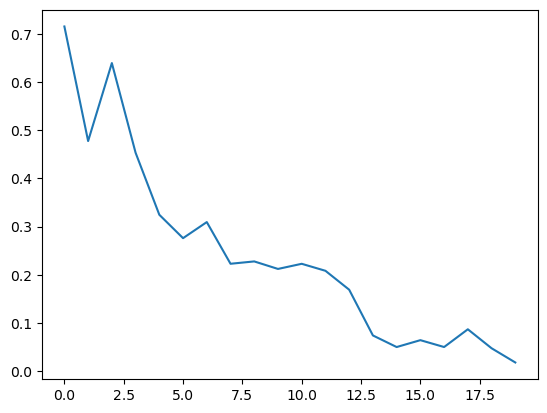

In [10]:
loss1 = []
for i in loss_val:
    loss1.append(i.item())
print(loss1)
plt.plot(range(len(loss1)),loss1)

In [11]:
test_transform = transforms.Compose([
    transforms.Resize(500),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [13]:
test_path = "C:\\Users\\revan\\Downloads\Cats_V1\\test_set\\test_set\\"
batch = 128

model_test_data = torchvision.datasets.ImageFolder(test_path,transform=test_transform)
test_data = DataLoader(model_test_data,batch_size=batch,shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


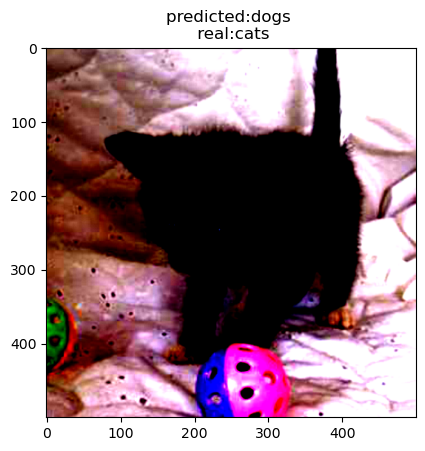

In [14]:
with torch.no_grad():
    test = []
    predicted = []

    for img,label in test_data:
        imgs = img[100].to(device)
        labels = label[100].to(device)
        test.append(labels)
        output_model = imgs.unsqueeze(0)
        # print(imgs.shape)
        output_model = model(output_model)
        # print(output_model)
        index = output_model.argmax()
        predicted.append(index)
        # imgs = torchvision.transforms.ToPILImage(imgs)
        plt.imshow(imgs.detach().cpu().numpy().transpose(1,2,0))
        plt.title(f"predicted:{ model_test_data.classes[index]} \n real:{ model_test_data.classes[labels]}")
        break

In [15]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_data:
        X_test, y_test = X_test.to(device), y_test.to(device)
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(model_test_data)} = {correct.item()*100/(len(model_test_data)):7.3f}%')

Test accuracy: 1365/2023 =  67.474%


In [ ]:
torch.save(model.state_dict(),"weights1.pkl")

In [16]:
from torchsummary import summary
summary(model,(3,500,500))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 6, 498, 498]             168
              ReLU-2          [-1, 6, 498, 498]               0
       BatchNorm2d-3          [-1, 6, 498, 498]              12
         MaxPool2d-4          [-1, 6, 249, 249]               0
            Conv2d-5         [-1, 16, 247, 247]             880
              ReLU-6         [-1, 16, 247, 247]               0
       BatchNorm2d-7         [-1, 16, 247, 247]              32
         MaxPool2d-8         [-1, 16, 123, 123]               0
            Conv2d-9         [-1, 24, 121, 121]           3,480
             ReLU-10         [-1, 24, 121, 121]               0
      BatchNorm2d-11         [-1, 24, 121, 121]              48
        MaxPool2d-12           [-1, 24, 60, 60]               0
           Linear-13                  [-1, 300]      25,920,300
             ReLU-14                  [